In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Verify the file path and ensure the file exists
file_path = '/content/drive/MyDrive/TFM/qualifying_1960-2024_seleccionado.xls'  # Double check this path!
!ls -l {file_path}  # Check if the file exists and its size

# Try opening the file with a text editor to inspect its contents
!head {file_path}

-rw------- 1 root root 248346 Jul 16 10:45 /content/drive/MyDrive/TFM/qualifying_1960-2024_seleccionado.xls
home_team,away_team,home_team_code,away_team_code,home_score,away_score,winner,winner_reason,year,status,round,score_dif,home_winner
Russia,Hungary,RUS,HUN,3.0,1.0,Russia,WIN_REGULAR,1960,FINISHED,ROUND_OF_16,2.0,True
France,Greece,FRA,GRE,7.0,1.0,France,WIN_REGULAR,1960,FINISHED,ROUND_OF_16,6.0,True
Romania,Türki̇ye,ROU,TUR,3.0,0.0,Romania,WIN_REGULAR,1960,FINISHED,ROUND_OF_16,3.0,True
Greece,France,GRE,FRA,1.0,1.0,,DRAW,1960,FINISHED,ROUND_OF_16,0.0,False
Ireland,Czechoslovakia,IRL,TCH,2.0,0.0,Ireland,WIN_REGULAR,1960,FINISHED,PRELIMINARY,2.0,True
Türki̇ye,Romania,TUR,ROU,2.0,0.0,Türki̇ye,WIN_REGULAR,1960,FINISHED,ROUND_OF_16,2.0,True
Czechoslovakia,Ireland,TCH,IRL,4.0,0.0,Czechoslovakia,WIN_REGULAR,1960,FINISHED,PRELIMINARY,4.0,True
Norway,Austria,NOR,AUT,0.0,1.0,Austria,WIN_REGULAR,1960,FINISHED,ROUND_OF_16,-1.0,False
Yugoslavia,Bulgaria,YUG,BUL,2.0,0.0,Yugoslavia,WIN_REGULAR

In [3]:
df1 = pd.read_csv(file_path)

In [4]:
df1.shape

(2831, 13)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2831 entries, 0 to 2830
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   home_team       2831 non-null   object 
 1   away_team       2831 non-null   object 
 2   home_team_code  2831 non-null   object 
 3   away_team_code  2831 non-null   object 
 4   home_score      2831 non-null   float64
 5   away_score      2831 non-null   float64
 6   winner          2282 non-null   object 
 7   winner_reason   2831 non-null   object 
 8   year            2831 non-null   int64  
 9   status          2831 non-null   object 
 10  round           2831 non-null   object 
 11  score_dif       2831 non-null   float64
 12  home_winner     2831 non-null   bool   
dtypes: bool(1), float64(3), int64(1), object(8)
memory usage: 268.3+ KB


In [6]:
#Number of matches by year
df1.groupby('year')['year'].count()
#Number of matches by round
df1['round'].value_counts()

round
PRELIMINARY       1422
QUALIFYING        1281
FINAL               56
QUARTER_FINALS      40
ROUND_OF_16         32
Name: count, dtype: int64

# Modelos

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#Calcular la media de goles anotados por cada país en casa y fuera
home_goals = df1.groupby('home_team')['home_score'].mean()
away_goals = df1.groupby('away_team')['away_score'].mean()

# Calcular la media de goles recibidos por cada país en casa y fuera
home_goals_against = df1.groupby('home_team')['away_score'].mean()
away_goals_against = df1.groupby('away_team')['home_score'].mean()

# Calcular la probabilidad de gol de cada país como la media de goles anotados en casa y fuera
goal_probability = (home_goals + away_goals) / 2

# Calcular la probabilidad de recibir gol de cada país como la media de goles recibidos en casa y fuera
goal_against_probability = (home_goals_against + away_goals_against) / 2

# Calcular la diferencia de goles promedio de cada país
goal_difference = goal_probability - goal_against_probability

# Calcular el número de partidos jugados por cada país
home_matches = df1.groupby('home_team').size()
away_matches = df1.groupby('away_team').size()
total_matches = home_matches + away_matches

# Añadir características al dataframe original
df1['home_goal_prob'] = df1['home_team'].map(goal_probability)
df1['away_goal_prob'] = df1['away_team'].map(goal_probability)
df1['home_goal_against_prob'] = df1['home_team'].map(goal_against_probability)
df1['away_goal_against_prob'] = df1['away_team'].map(goal_against_probability)
df1['home_goal_diff'] = df1['home_team'].map(goal_difference)
df1['away_goal_diff'] = df1['away_team'].map(goal_difference)
df1['home_total_matches'] = df1['home_team'].map(total_matches)
df1['away_total_matches'] = df1['away_team'].map(total_matches)

# Mostrar las primeras filas del DataFrame actualizado
print(df1.head())

df1.info()


  home_team       away_team home_team_code away_team_code  home_score  \
0    Russia         Hungary            RUS            HUN         3.0   
1    France          Greece            FRA            GRE         7.0   
2   Romania        Türki̇ye            ROU            TUR         3.0   
3    Greece          France            GRE            FRA         1.0   
4   Ireland  Czechoslovakia            IRL            TCH         2.0   

   away_score   winner winner_reason  year    status  ... score_dif  \
0         1.0   Russia   WIN_REGULAR  1960  FINISHED  ...       2.0   
1         1.0   France   WIN_REGULAR  1960  FINISHED  ...       6.0   
2         0.0  Romania   WIN_REGULAR  1960  FINISHED  ...       3.0   
3         1.0      NaN          DRAW  1960  FINISHED  ...       0.0   
4         0.0  Ireland   WIN_REGULAR  1960  FINISHED  ...       2.0   

   home_winner  home_goal_prob  away_goal_prob  home_goal_against_prob  \
0         True        2.050962        1.623602              

<ipython-input-8-27afa72093e5>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=features_df.sort_values(by='goal_probability', ascending=False), x='goal_probability', y='team', palette='viridis')
<ipython-input-8-27afa72093e5>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=features_df.sort_values(by='goal_against_probability', ascending=False), x='goal_against_probability', y='team', palette='magma')
<ipython-input-8-27afa72093e5>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=features_df.sort_values(by='goal_difference

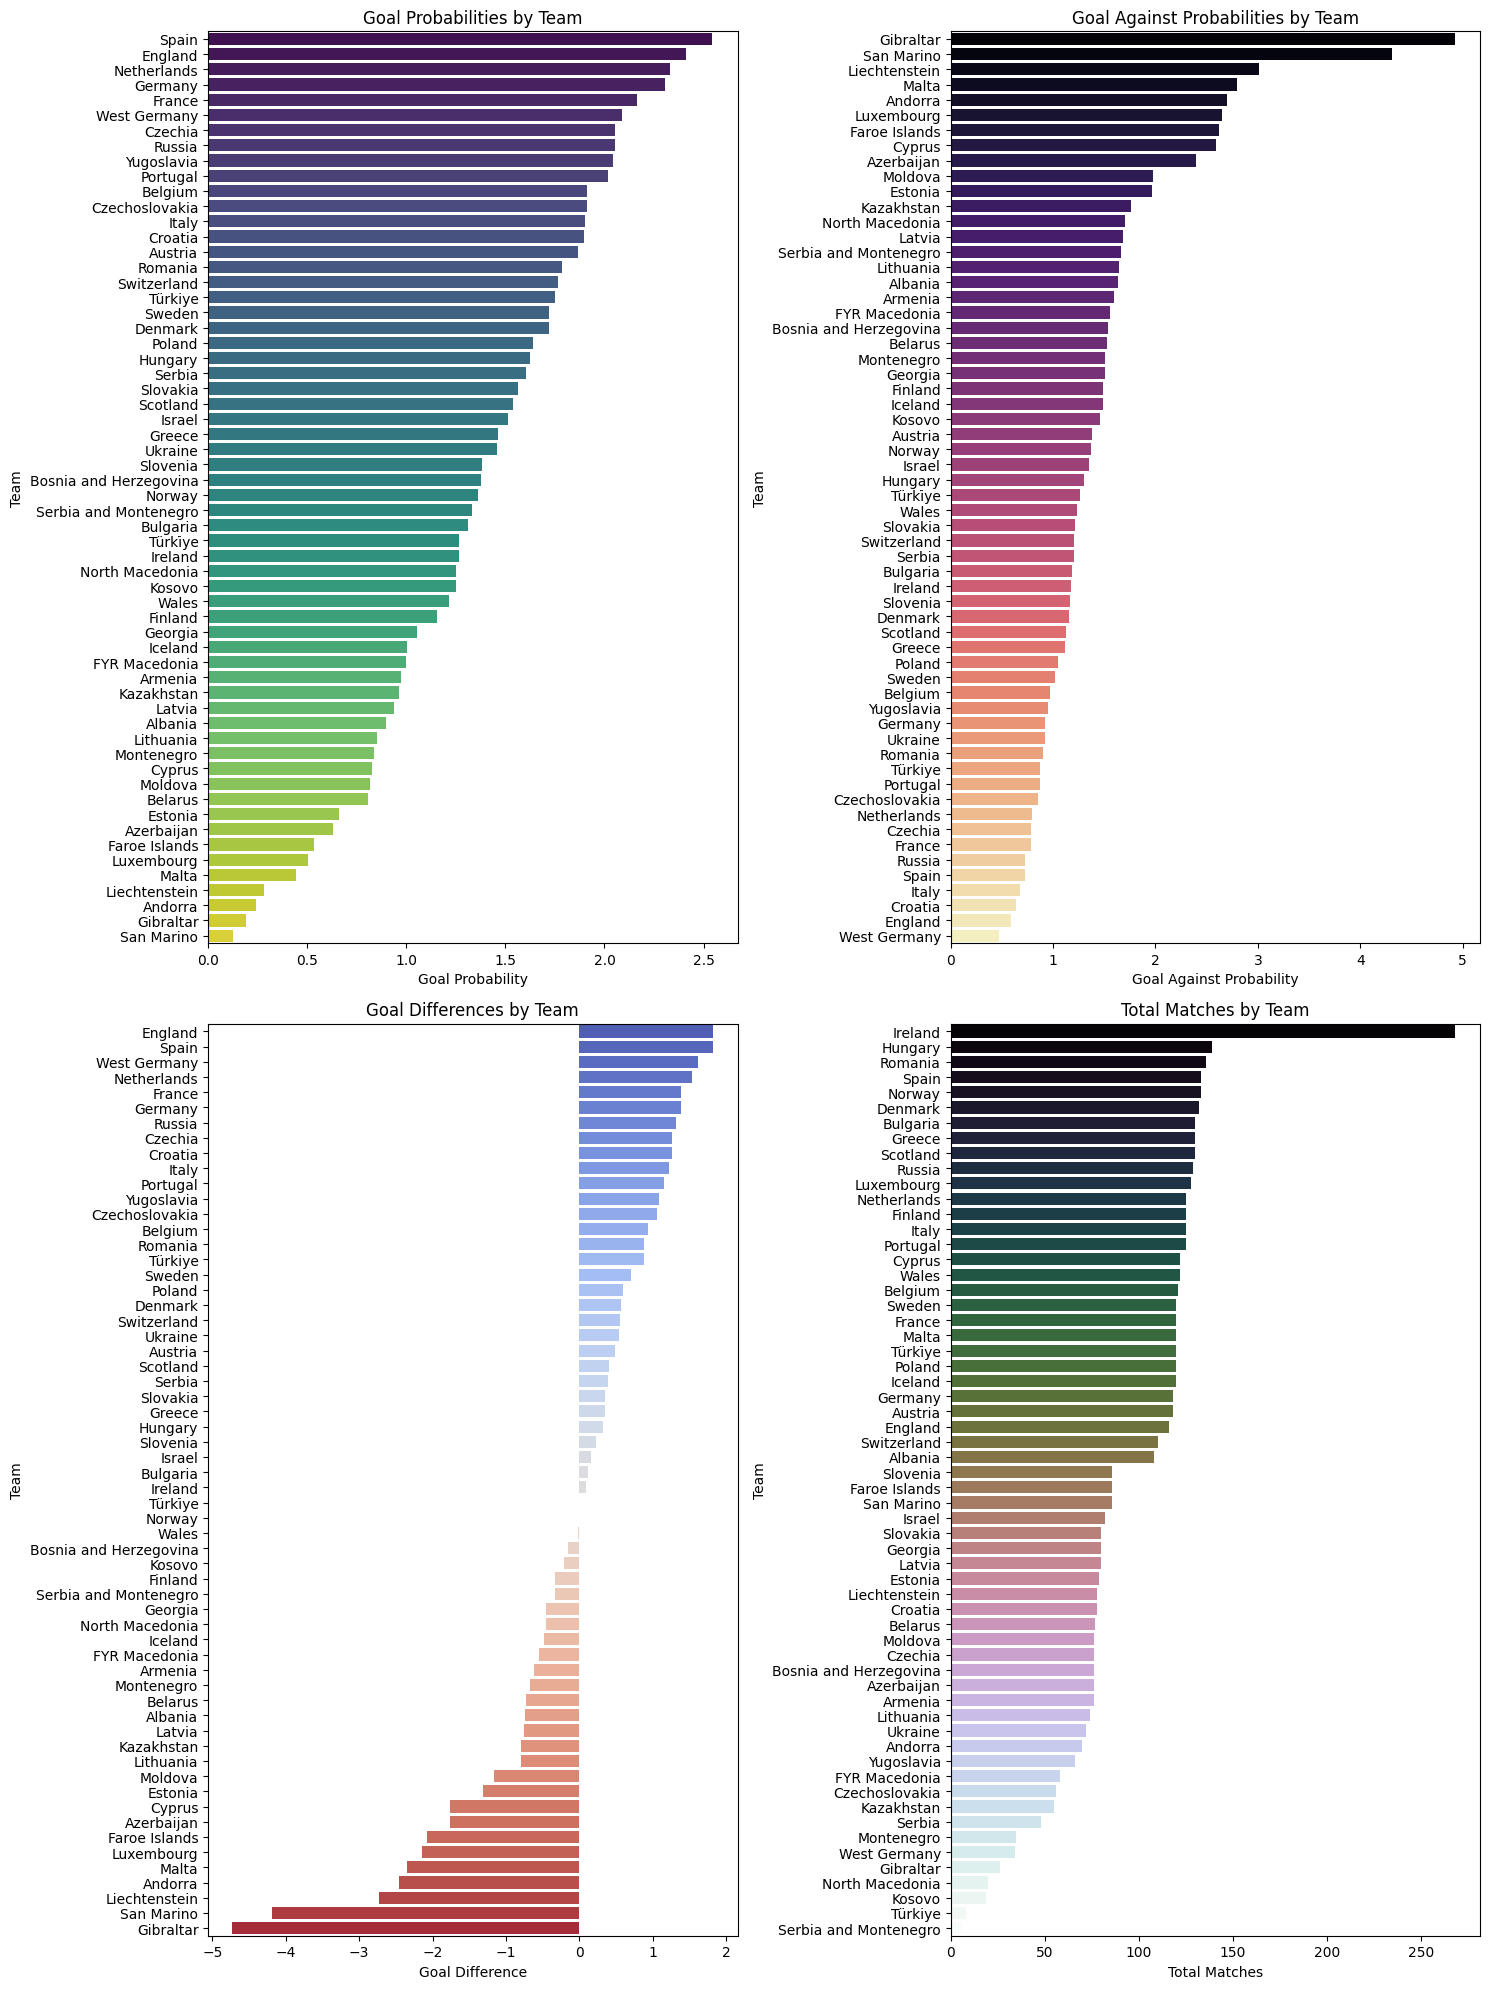

In [8]:
# Crear un DataFrame con todas las características
features_df = pd.DataFrame({
    'goal_probability': goal_probability,
    'goal_against_probability': goal_against_probability,
    'goal_difference': goal_difference,
    'total_matches': total_matches
}).reset_index()
features_df.columns = ['team', 'goal_probability', 'goal_against_probability', 'goal_difference', 'total_matches']

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 20))

# Crear un gráfico de barras para la probabilidad de gol
plt.subplot(2, 2, 1)
sns.barplot(data=features_df.sort_values(by='goal_probability', ascending=False), x='goal_probability', y='team', palette='viridis')
plt.xlabel('Goal Probability')
plt.ylabel('Team')
plt.title('Goal Probabilities by Team')

# Crear un gráfico de barras para la probabilidad de recibir gol
plt.subplot(2, 2, 2)
sns.barplot(data=features_df.sort_values(by='goal_against_probability', ascending=False), x='goal_against_probability', y='team', palette='magma')
plt.xlabel('Goal Against Probability')
plt.ylabel('Team')
plt.title('Goal Against Probabilities by Team')

# Crear un gráfico de barras para la diferencia de goles promedio
plt.subplot(2, 2, 3)
sns.barplot(data=features_df.sort_values(by='goal_difference', ascending=False), x='goal_difference', y='team', palette='coolwarm')
plt.xlabel('Goal Difference')
plt.ylabel('Team')
plt.title('Goal Differences by Team')

# Crear un gráfico de barras para el número de partidos jugados
plt.subplot(2, 2, 4)
sns.barplot(data=features_df.sort_values(by='total_matches', ascending=False), x='total_matches', y='team', palette='cubehelix')
plt.xlabel('Total Matches')
plt.ylabel('Team')
plt.title('Total Matches by Team')

# Ajustar el layout
plt.tight_layout()
plt.show()

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Seleccionar las columnas de interés
X = df1[['home_team', 'away_team', 'round', 'home_goal_prob', 'away_goal_prob',
        'home_goal_against_prob', 'away_goal_against_prob', 'home_goal_diff',
        'away_goal_diff', 'home_total_matches', 'away_total_matches']]  # Características
y = df1['home_winner']  # Variable objetivo

# Convertir las variables categóricas en variables numéricas usando OneHotEncoder
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[['home_team', 'away_team', 'round']])

# Convertir el resultado de OneHotEncoder a DataFrame
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out())

# Añadir las probabilidades de gol al dataset codificado
X_encoded_df['home_goal_prob'] = X['home_goal_prob'].values
X_encoded_df['away_goal_prob'] = X['away_goal_prob'].values
X_encoded_df['home_goal_against_prob'] = X['home_goal_against_prob'].values
X_encoded_df['away_goal_against_prob'] = X['away_goal_against_prob'].values
X_encoded_df['home_goal_diff'] = X['home_goal_diff'].values
X_encoded_df['away_goal_diff'] = X['away_goal_diff'].values
X_encoded_df['home_total_matches'] = X['home_total_matches'].values
X_encoded_df['away_total_matches'] = X['away_total_matches'].values

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded_df)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



## Redes Neuronales: Multilayer Perceptron (MLP)

In [11]:
# Crear el modelo de MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Entrenar el modelo
MLP.fit(X_train, y_train)

# Hacer predicciones
y_pred = MLP.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7037037037037037
Classification Report:
              precision    recall  f1-score   support

       False       0.72      0.70      0.71       290
        True       0.69      0.71      0.70       277

    accuracy                           0.70       567
   macro avg       0.70      0.70      0.70       567
weighted avg       0.70      0.70      0.70       567



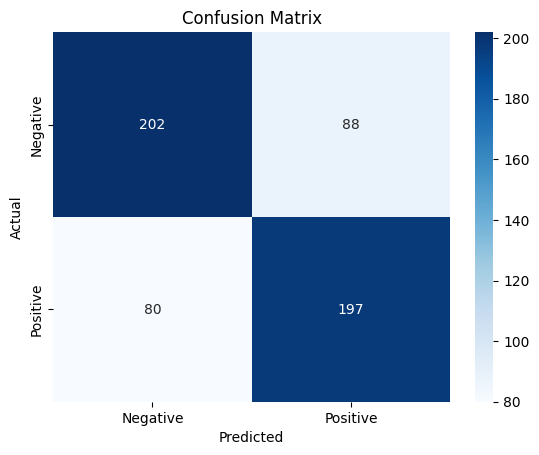

In [12]:
# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [13]:
# Predecir el resultado de nuevos partidos de la Eurocopa
# Supongamos que tienes un nuevo dataset con los partidos de la Eurocopa
new_matches = {
    'home_team': ['Germany', 'Spain', 'Spain'],  # Ejemplo de equipos en casa
    'away_team': ['Spain', 'France', 'England'],  # Ejemplo de equipos fuera
    'round': ['QUARTER_FINALS', 'PRELIMINARY', 'FINAL']  # Ejemplo de rondas
}

new_matches_df = pd.DataFrame(new_matches)

# Añadir las probabilidades de gol al nuevo dataset
new_matches_df['home_goal_prob'] = new_matches_df['home_team'].map(goal_probability)
new_matches_df['away_goal_prob'] = new_matches_df['away_team'].map(goal_probability)
new_matches_df['home_goal_against_prob'] = new_matches_df['home_team'].map(goal_against_probability)
new_matches_df['away_goal_against_prob'] = new_matches_df['away_team'].map(goal_against_probability)
new_matches_df['home_goal_diff'] = new_matches_df['home_team'].map(goal_difference)
new_matches_df['away_goal_diff'] = new_matches_df['away_team'].map(goal_difference)
new_matches_df['home_total_matches'] = new_matches_df['home_team'].map(total_matches)
new_matches_df['away_total_matches'] = new_matches_df['away_team'].map(total_matches)

# Codificar las nuevas partidas
new_matches_encoded = encoder.transform(new_matches_df[['home_team', 'away_team', 'round']])

# Convertir el resultado de OneHotEncoder a DataFrame, especificando los nombres de las columnas
new_matches_encoded_df = pd.DataFrame(new_matches_encoded.toarray(), columns=encoder.get_feature_names_out())

# Añadir las probabilidades de gol al dataset codificado
new_matches_encoded_df['home_goal_prob'] = new_matches_df['home_goal_prob'].values
new_matches_encoded_df['away_goal_prob'] = new_matches_df['away_goal_prob'].values
new_matches_encoded_df['home_goal_against_prob'] = new_matches_df['home_goal_against_prob'].values
new_matches_encoded_df['away_goal_against_prob'] = new_matches_df['away_goal_against_prob'].values
new_matches_encoded_df['home_goal_diff'] = new_matches_df['home_goal_diff'].values
new_matches_encoded_df['away_goal_diff'] = new_matches_df['away_goal_diff'].values
new_matches_encoded_df['home_total_matches'] = new_matches_df['home_total_matches'].values
new_matches_encoded_df['away_total_matches'] = new_matches_df['away_total_matches'].values

# Escalar las características de las nuevas partidas
new_matches_scaled = scaler.transform(new_matches_encoded_df) # Use the same scaler fitted on the training data

# Predecir con el modelo entrenado
new_predictions = MLP.predict(new_matches_scaled) # Pass the scaled data to predict

# Mostrar los resultados
new_matches_df['home_winner'] = new_predictions
print(new_matches_df)

  home_team away_team           round  home_goal_prob  away_goal_prob  \
0   Germany     Spain  QUARTER_FINALS        2.305085        2.544324   
1     Spain    France     PRELIMINARY        2.544324        2.166667   
2     Spain   England           FINAL        2.544324        2.413793   

   home_goal_against_prob  away_goal_against_prob  home_goal_diff  \
0                0.923729                0.724446        1.381356   
1                0.724446                0.783333        1.819878   
2                0.724446                0.586207        1.819878   

   away_goal_diff  home_total_matches  away_total_matches  home_winner  
0        1.819878                 118                 133        False  
1        1.383333                 133                 120        False  
2        1.827586                 133                 116        False  


## Random Forest Classifier

In [14]:
# Crear el modelo de RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
RFC.fit(X_train, y_train)

# Hacer predicciones
y_pred = RFC.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7248677248677249
Classification Report:
              precision    recall  f1-score   support

       False       0.73      0.72      0.73       290
        True       0.72      0.73      0.72       277

    accuracy                           0.72       567
   macro avg       0.72      0.72      0.72       567
weighted avg       0.73      0.72      0.72       567



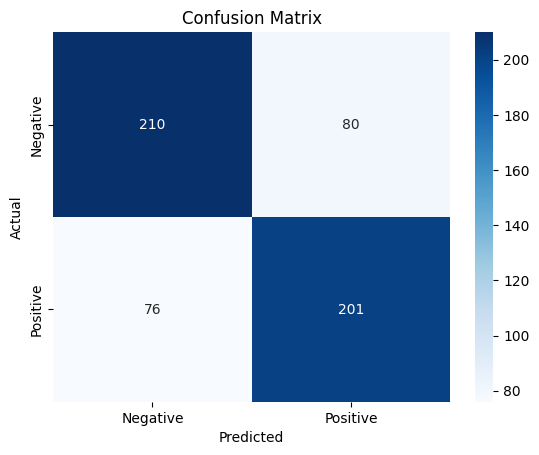

In [15]:
# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [16]:
# Predecir el resultado de nuevos partidos de la Eurocopa
# Supongamos que tienes un nuevo dataset con los partidos de la Eurocopa
new_matches = {
    'home_team': ['Germany', 'Spain', 'Spain'],  # Ejemplo de equipos en casa
    'away_team': ['Spain', 'France', 'England'],  # Ejemplo de equipos fuera
    'round': ['QUARTER_FINALS', 'PRELIMINARY', 'FINAL']  # Ejemplo de rondas
}

new_matches_df = pd.DataFrame(new_matches)

# Añadir las probabilidades de gol al nuevo dataset
new_matches_df['home_goal_prob'] = new_matches_df['home_team'].map(goal_probability)
new_matches_df['away_goal_prob'] = new_matches_df['away_team'].map(goal_probability)
new_matches_df['home_goal_against_prob'] = new_matches_df['home_team'].map(goal_against_probability)
new_matches_df['away_goal_against_prob'] = new_matches_df['away_team'].map(goal_against_probability)
new_matches_df['home_goal_diff'] = new_matches_df['home_team'].map(goal_difference)
new_matches_df['away_goal_diff'] = new_matches_df['away_team'].map(goal_difference)
new_matches_df['home_total_matches'] = new_matches_df['home_team'].map(total_matches)
new_matches_df['away_total_matches'] = new_matches_df['away_team'].map(total_matches)

# Codificar las nuevas partidas
new_matches_encoded = encoder.transform(new_matches_df[['home_team', 'away_team', 'round']])

# Crear un nuevo DataFrame con las variables codificadas y nombres de columnas correctos
new_matches_encoded_df = pd.DataFrame.sparse.from_spmatrix(
    new_matches_encoded,
    columns=encoder.get_feature_names_out(['home_team', 'away_team', 'round'])
)

# Concatenar las variables numéricas originales con las codificadas
# Ensure both DataFrames have numeric columns
new_matches_final = pd.concat(
    [new_matches_encoded_df, new_matches_df[['home_goal_prob', 'away_goal_prob', 'home_goal_against_prob',
                        'away_goal_against_prob', 'home_goal_diff', 'away_goal_diff',
                        'home_total_matches', 'away_total_matches']].astype(float)],axis=1)

# Predecir con el modelo entrenado
new_predictions = RFC.predict(new_matches_final)

# Mostrar los resultados
new_matches_df['home_winner'] = new_predictions
print(new_matches_df)

  home_team away_team           round  home_goal_prob  away_goal_prob  \
0   Germany     Spain  QUARTER_FINALS        2.305085        2.544324   
1     Spain    France     PRELIMINARY        2.544324        2.166667   
2     Spain   England           FINAL        2.544324        2.413793   

   home_goal_against_prob  away_goal_against_prob  home_goal_diff  \
0                0.923729                0.724446        1.381356   
1                0.724446                0.783333        1.819878   
2                0.724446                0.586207        1.819878   

   away_goal_diff  home_total_matches  away_total_matches  home_winner  
0        1.819878                 118                 133         True  
1        1.383333                 133                 120         True  
2        1.827586                 133                 116         True  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


##Logistic Regression

In [17]:
# Crear el modelo de Logistic Regression
Logistic_Regression = LogisticRegression(random_state=42)

# Entrenar el modelo
Logistic_Regression.fit(X_train, y_train)

# Hacer predicciones
y_pred = Logistic_Regression.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7601410934744268
Classification Report:
              precision    recall  f1-score   support

       False       0.76      0.77      0.77       290
        True       0.76      0.75      0.75       277

    accuracy                           0.76       567
   macro avg       0.76      0.76      0.76       567
weighted avg       0.76      0.76      0.76       567



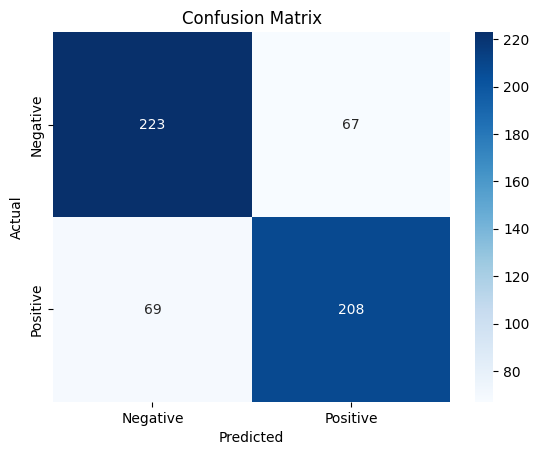

In [18]:
# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Predecir el resultado de nuevos partidos de la Eurocopa
# Supongamos que tienes un nuevo dataset con los partidos de la Eurocopa
new_matches = {
    'home_team': ['Germany', 'Spain', 'Spain'],  # Ejemplo de equipos en casa
    'away_team': ['Spain', 'France', 'England'],  # Ejemplo de equipos fuera
    'round': ['QUARTER_FINALS', 'PRELIMINARY', 'FINAL']  # Ejemplo de rondas
}

new_matches_df = pd.DataFrame(new_matches)

# Añadir las probabilidades de gol al nuevo dataset
new_matches_df['home_goal_prob'] = new_matches_df['home_team'].map(goal_probability)
new_matches_df['away_goal_prob'] = new_matches_df['away_team'].map(goal_probability)
new_matches_df['home_goal_against_prob'] = new_matches_df['home_team'].map(goal_against_probability)
new_matches_df['away_goal_against_prob'] = new_matches_df['away_team'].map(goal_against_probability)
new_matches_df['home_goal_diff'] = new_matches_df['home_team'].map(goal_difference)
new_matches_df['away_goal_diff'] = new_matches_df['away_team'].map(goal_difference)
new_matches_df['home_total_matches'] = new_matches_df['home_team'].map(total_matches)
new_matches_df['away_total_matches'] = new_matches_df['away_team'].map(total_matches)

# Codificar las nuevas partidas
new_matches_encoded = encoder.transform(new_matches_df[['home_team', 'away_team', 'round']])
new_matches_encoded_df = pd.DataFrame.sparse.from_spmatrix(
    new_matches_encoded,
    columns=encoder.get_feature_names_out(['home_team', 'away_team', 'round']))

# Añadir las probabilidades de gol al dataset codificado
new_matches_encoded_df['home_goal_prob'] = new_matches_df['home_goal_prob'].values
new_matches_encoded_df['away_goal_prob'] = new_matches_df['away_goal_prob'].values
new_matches_encoded_df['home_goal_against_prob'] = new_matches_df['home_goal_against_prob'].values
new_matches_encoded_df['away_goal_against_prob'] = new_matches_df['away_goal_against_prob'].values
new_matches_encoded_df['home_goal_diff'] = new_matches_df['home_goal_diff'].values
new_matches_encoded_df['away_goal_diff'] = new_matches_df['away_goal_diff'].values
new_matches_encoded_df['home_total_matches'] = new_matches_df['home_total_matches'].values
new_matches_encoded_df['away_total_matches'] = new_matches_df['away_total_matches'].values

# Escalar las características
new_matches_scaled = scaler.transform(new_matches_encoded_df)

# Predecir con el modelo entrenado
new_predictions = Logistic_Regression.predict(new_matches_scaled)

# Mostrar los resultados
new_matches_df['home_winner'] = new_predictions
print(new_matches_df)

  home_team away_team           round  home_goal_prob  away_goal_prob  \
0   Germany     Spain  QUARTER_FINALS        2.305085        2.544324   
1     Spain    France     PRELIMINARY        2.544324        2.166667   
2     Spain   England           FINAL        2.544324        2.413793   

   home_goal_against_prob  away_goal_against_prob  home_goal_diff  \
0                0.923729                0.724446        1.381356   
1                0.724446                0.783333        1.819878   
2                0.724446                0.586207        1.819878   

   away_goal_diff  home_total_matches  away_total_matches  home_winner  
0        1.819878                 118                 133         True  
1        1.383333                 133                 120         True  
2        1.827586                 133                 116        False  


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


### Cross Validation

In [ ]:
# Validación Cruzada
results = []
for i in range(2,7):
  print(f"\nValidación Cruzada con i folds:")
  cv_scores1 = cross_val_score(MLP, X_encoded, y, cv=i)
  cv_scores2 = cross_val_score(RFC, X_encoded, y, cv=i)
  cv_scores3 = cross_val_score(Logistic_Regression, X_encoded, y, cv=i)

  results.append({
      'Folds': i,
      'MLP': cv_scores1.mean(),
      'Random Forest Classifier': cv_scores2.mean(),
      'Logistic Regression': cv_scores3.mean()
  })

results_df = pd.DataFrame(results)
print(results_df)


Validación Cruzada con i folds:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Validación Cruzada con i folds:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Validación Cruzada con i folds:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Validación Cruzada con i folds:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro


Validación Cruzada con i folds:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro


Validación Cruzada con i folds:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro


Validación Cruzada con i folds:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro


Validación Cruzada con i folds:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro


Validación Cruzada con i folds:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

   Folds       MLP       RFC  Logistic Regression
0      2  0.689169  0.681048             0.705415
1      3  0.677149  0.696575             0.718127
2      4  0.684923  0.707882             0.725547
3      5  0.686720  0.701551             0.731932
4      6  0.693399  0.716723             0.739677
5      7  0.698370  0.717813             0.747464
6      8  0.701523  0.725550             0.743211
7      9  0.702247  0.714263             0.742508
8     10  0.702253  0.719207             0.745342


## Curvas ROC

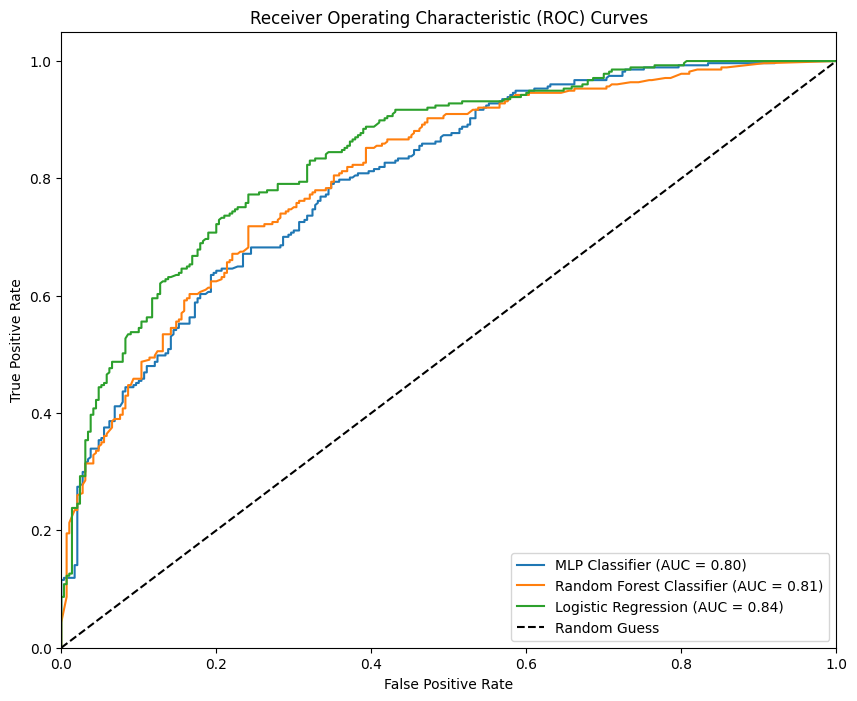

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Crear y entrenar los modelos
models = {
    'MLP Classifier': MLPClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    models[name] = model

# Función para plotear las curvas ROC
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 8))

    for name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc='lower right')
    plt.show()

# Plotear las curvas ROC de los tres modelos
plot_roc_curves(models, X_test, y_test)